In [13]:
from google.colab import files
uploaded = files.upload()
import io


Saving Credit.csv to Credit (2).csv


# Pregunta 1
## Prepare el ambiente de trabajo

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# df = pn.read_csv('Credit.csv', index_col=0)
df = pd.read_csv(io.BytesIO(uploaded['Credit.csv']), index_col=0)

In [82]:
# regiones = df['region'].unique().tolist()
ethnicitys = ['African American', 'Asian', 'Caucasian']
for ethnicity in ethnicitys:
    df[ethnicity] = np.where(df['Ethnicity'] == ethnicity, True, False)
    print (df[df['Ethnicity'] == ethnicity]['Ethnicity'].value_counts())
    print ('\n')

African American    99
Name: Ethnicity, dtype: int64


Asian    102
Name: Ethnicity, dtype: int64


Caucasian    199
Name: Ethnicity, dtype: int64




# Pregunta 2
##  Genere gráficos descriptivos para las variables contínuas

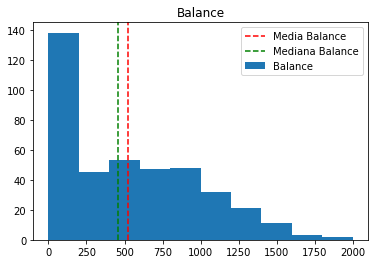

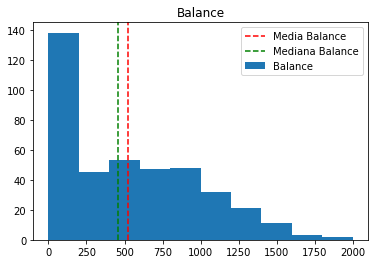

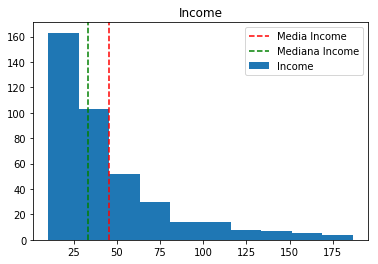

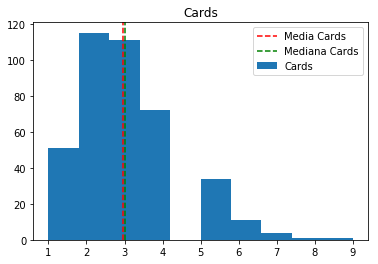

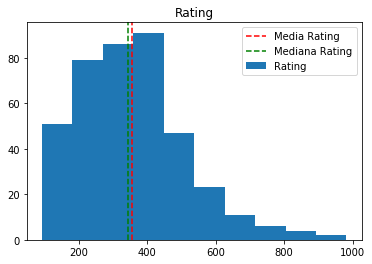

In [51]:
def plot_hist(dataframe, variable):
    data = dataframe[variable].dropna()
    plt.hist(data, alpha = 1, label = variable)
    plt.axvline(data.mean(), color="red", label = "Media "+variable, linestyle = "--")
    plt.axvline(data.median(), color = "green", label = "Mediana "+variable, linestyle = "--")
    plt.title(variable)
    plt.legend()
    plt.show()
    
plot_hist(df, "Balance")
plot_hist(df, "Balance")
plot_hist(df, "Income")
plot_hist(df, "Cards")
plot_hist(df, "Rating")

# Pregunta 3
## Regresión Lineal Simple

In [52]:
modelo_student = smf.ols("Balance ~ Student", df).fit()
modelo_income = smf.ols("Balance ~ Income", df).fit()
modelo_rating = smf.ols("Balance ~ Rating", df).fit()
print (modelo_student.summary())
print ('****************************************************************************************************\n\n\n')
print (modelo_income.summary())
print ('****************************************************************************************************\n\n\n')
print (modelo_rating.summary())
print ('****************************************************************************************************\n\n\n')

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Wed, 17 Jul 2019   Prob (F-statistic):           1.49e-07
Time:                        00:18:57   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        480.3694     23.434     20.



1.   De los modelos creados, el que mejor explica la variable *Balance* es el modelo con la variable independiente *Rating*, explicandola en un 74%
2.   *Student* explica en un 6% el comportamiento de *Balance*
3.   La diferencia entre un estudiante y no estudiante para la variable Balance es de 876 puntos.



In [53]:
def prueba_hipotesis (dataframe, variable, binarize):
    resultado = stats.ttest_ind(dataframe.query("{} == 1".format(binarize))[variable].dropna(),
                                dataframe.query("{} == 0".format(binarize))[variable].dropna())
    media_1 = round(dataframe.query("{} == 1".format(binarize))[variable].dropna().mean(), 3)
    media_resto = round(dataframe.query("{} == 0".format(binarize))[variable].dropna().mean(), 3)
    diferencia_medias = round((media_1 - media_resto), 3)
    print("La variable analizada es {}".format(variable))
    print("El binario utilizado es {}".format(binarize))
    print("La media del continente es {}, mientras que para el resto de continentes la media es {}".format(media_1, media_resto))
    print("La diferencia entre las medias anteriores es {}".format(diferencia_medias))      
    print("Los puntajes t y p son {}".format(resultado))
prueba_hipotesis(df, "Balance", "bin_student")

La variable analizada es Balance
El binario utilizado es bin_student
La media del continente es 876.825, mientras que para el resto de continentes la media es 480.369
La diferencia entre las medias anteriores es 396.456
Los puntajes t y p son Ttest_indResult(statistic=5.349964123075003, pvalue=1.4877341077323024e-07)


Con un pvalue de 1.48 cae en nuestra zona de no rechazo, por lo que no podemos rechazar nuestra hipotesis nula.

#pregunta 4
## Genere un modelo que incluya todos los regresores

In [90]:
#Male = 1, Female = 0
#Estudiante = 1, No_estudiante = 0
#Married = 1


df["bin_male"] = np.where(df["Gender"].str.strip() == "Male", 1, 0)
df["bin_student"] = np.where(df["Student"].str.strip() == "Yes", 1, 0)
df["bin_married"] = np.where(df["Married"].str.strip() == "Yes", 1, 0)
df["bin_african_american"] = np.where(df["African American"], 1, 0)
df["bin_asian"] = np.where(df["Asian"], 1, 0)
df["bin_caucasian"] = np.where(df["Caucasian"], 1, 0)

modelo= smf.ols("Balance ~ Income + Limit + Rating + Cards + Age + Education + bin_male + bin_student + bin_married + bin_african_american + bin_asian + bin_caucasian", df).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Wed, 17 Jul 2019   Prob (F-statistic):          1.11e-253
Time:                        00:53:24   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -360.6680     25.839    -13.958      0.000    -411.471    -309.865
Income                  -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Limit                    0.1909      0.033      5.824      0.000       0.126       0.255
Rating                   1.1365      0.491      2.315      0.021       0.171       2.102
Cards                   17.7245      4.341      4.083      0.000       9.190      26.259
Age                     -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Education               -1.0989      1.598     -0.688      0.492      -4.241       2.043
bin_male                10.6532      9.914      1.075      0.283      -8.839      30.145
bin_student            425.7474     16.723     25.459      0.000     392.869     458.626
bin_married             -8.5339     10.363     -0.824      0.411     -28.908      11.841
bin_african_american  -129.1931     11.987    -10.777      0.000    -152.762    -105.625
bin_asian             -112.3889     11.511     -9.764      0.000    -135.020     -89.758
bin_caucasian         -119.0861     10.559    -11.278      0.000    -139.846     -98.326
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     2.50e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.79e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- Según la información anterior, las primeras variables que debemos descartar del modelo son Age (p=0.037), Education (p=0.492), bin_male (p=0.283) y bin_married(p=0.411)

# Desafío 5
## Depure el modelo e incluya sólo los predictores significativo

In [95]:
modelo= smf.ols("Balance ~ Income + Limit + Rating + Cards + bin_student + bin_african_american + bin_asian + bin_caucasian", df).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1170.
Date:                Wed, 17 Jul 2019   Prob (F-statistic):          2.79e-258
Time:                        01:08:05   Log-Likelihood:                -2402.1
No. Observations:                 400   AIC:                             4820.
Df Residuals:                     392   BIC:                             4852.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -395.6995     14.869    -26.612      0.000    -424.933    -366.466
Income                  -7.8735      0.232    -33.981      0.000      -8.329      -7.418
Limit                    0.1927      0.033      5.910      0.000       0.129       0.257
Rating                   1.1147      0.488      2.283      0.023       0.155       2.075
Cards                   17.7089      4.342      4.079      0.000       9.173      26.245
bin_student            426.2979     16.616     25.656      0.000     393.631     458.965
bin_african_american  -141.0360      9.521    -14.813      0.000    -159.755    -122.317
bin_asian             -124.0494      9.111    -13.616      0.000    -141.961    -106.138
bin_caucasian         -130.6140      8.010    -16.306      0.000    -146.363    -114.865
==============================================================================
Omnibus:                       31.057   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.291
Skew:                           0.730   Prob(JB):                     1.32e-08
Kurtosis:                       3.211   Cond. No.                     3.08e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.18e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Nuestro modelo final explica 95% del comportamiento de la variable

# Desafío 6
## Utilizando lmplot de seaborn , inspeccione el comportamiento de los tres principales determinantes


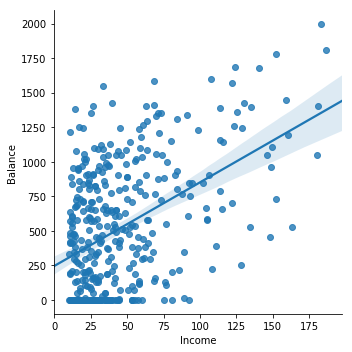

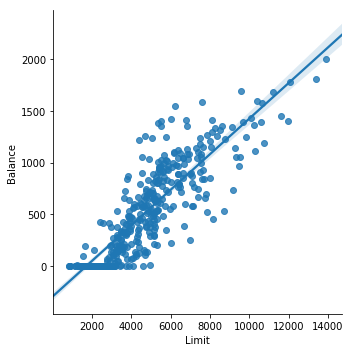

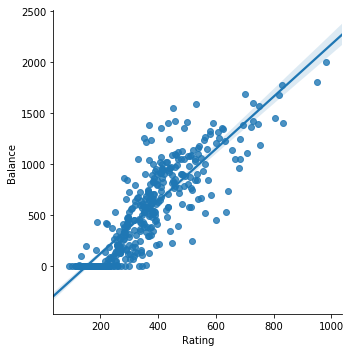

In [99]:
sns.lmplot(x="Income", y="Balance", data=df)
sns.lmplot(x="Limit", y="Balance", data=df)
sns.lmplot(x="Rating", y="Balance", data=df)